#start


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:

import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


In [3]:


# Paths
output_dir = '/content/drive/MyDrive/Tomato_dataset/cnn_crops'

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    zoom_range=0.2
)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
datasets_dict = {
    'ripe': {
        'train': train_datagen.flow_from_directory(
            os.path.join(output_dir, 'ripe/train'),
            target_size=(224,224),
            batch_size=16,
            class_mode='categorical'
        ),
        'val': val_datagen.flow_from_directory(
            os.path.join(output_dir, 'ripe/val'),
            target_size=(224,224),
            batch_size=16,
            class_mode='categorical'
        )
    },
    'green': {
        'train': train_datagen.flow_from_directory(
            os.path.join(output_dir, 'green/train'),
            target_size=(224,224),
            batch_size=16,
            class_mode='categorical'
        ),
        'val': val_datagen.flow_from_directory(
            os.path.join(output_dir, 'green/val'),
            target_size=(224,224),
            batch_size=16,
            class_mode='categorical'
        )
    }
}

# Define CNN model
def create_cnn(num_classes):
    model = Sequential([
        Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
        MaxPooling2D(2,2),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


Found 709 images belonging to 5 classes.
Found 210 images belonging to 5 classes.
Found 2805 images belonging to 5 classes.
Found 725 images belonging to 5 classes.


In [4]:
# Cell 2: Train Ripe Tomato CNN

ripe_train = datasets_dict['ripe']['train']
ripe_val = datasets_dict['ripe']['val']
num_classes = len(ripe_train.class_indices)

ripe_model = create_cnn(num_classes)

ripe_save_path = '/content/drive/MyDrive/Tomato_dataset/models/ripe_cnn.h5'

history_ripe = ripe_model.fit(
    ripe_train,
    validation_data=ripe_val,
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

ripe_model.save(ripe_save_path)
print(f"Ripe CNN trained and saved to {ripe_save_path}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - accuracy: 0.4483 - loss: 2.7629 - val_accuracy: 0.5381 - val_loss: 1.1844
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5841 - loss: 1.1701 - val_accuracy: 0.5381 - val_loss: 1.1213
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5414 - loss: 1.1646 - val_accuracy: 0.5429 - val_loss: 1.1095
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5113 - loss: 1.2125 - val_accuracy: 0.5095 - val_loss: 1.1360
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5586 - loss: 1.1293 - val_accuracy: 0.5190 - val_loss: 1.1244
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6097 - loss: 1.0284 - val_accuracy: 0.5333 - val_loss: 1.1447
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5598 - loss: 1.0378 - val_accuracy: 0.5381 - val_loss: 1.1047
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5916 - loss: 1.0333 - val_accuracy: 0.5429 - val_loss

Ripe CNN trained and saved to /content/drive/MyDrive/Tomato_dataset/models/ripe_cnn.h5


In [5]:
ripe_model.save('/content/drive/MyDrive/Tomato_dataset/models/ripe_cnn.keras')


In [6]:
# Cell 3: Train Green Tomato CNN

green_train = datasets_dict['green']['train']
green_val = datasets_dict['green']['val']
num_classes = len(green_train.class_indices)

green_model = create_cnn(num_classes)

green_save_path = '/content/drive/MyDrive/Tomato_dataset/models/green_cnn.h5'

history_green = green_model.fit(
    green_train,
    validation_data=green_val,
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

green_model.save(green_save_path)
print(f"Green CNN trained and saved to {green_save_path}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 1137s 6s/step - accuracy: 0.4989 - loss: 2.1825 - val_accuracy: 0.5062 - val_loss: 0.9544
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.5613 - loss: 0.9413 - val_accuracy: 0.5172 - val_loss: 0.8889
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.5417 - loss: 0.8999 - val_accuracy: 0.5228 - val_loss: 0.8882
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.5590 - loss: 0.9017 - val_accuracy: 0.5186 - val_loss: 0.8866
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.5781 - loss: 0.8983 - val_accuracy: 0.5628 - val_loss: 0.8730
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.5641 - loss: 0.8812 - val_accuracy: 0.5641 - val_loss: 0.8551
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.5868 - loss: 0.8708 - val_accuracy: 0.5876 - val_loss: 0.8832
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.5828 - loss: 0.8645 - val_acc

Green CNN trained and saved to /content/drive/MyDrive/Tomato_dataset/models/green_cnn.h5


In [ ]:
green_model.save('/content/drive/MyDrive/Tomato_dataset/models/green_cnn.keras')


In [ ]:


# Define CNN (same as training)
class TomatoCNN(nn.Module):
    def __init__(self, num_classes):
        super(TomatoCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(32 * 56 * 56, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Data transform
val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Evaluate function
def evaluate_cnn(model, val_loader, class_names, title):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device).eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{title} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Load and evaluate models
output_dir = '/content/drive/MyDrive/Tomato_dataset/cnn_crops'
for ripeness in ['ripe', 'green']:
    val_dataset = datasets.ImageFolder(f'{output_dir}/{ripeness}/val', transform=val_transform)
    val_loader = DataLoader(val_dataset, batch_size=16)
    model = TomatoCNN(num_classes=len(val_dataset.classes))
    model.load_state_dict(torch.load(f'/content/drive/MyDrive/Tomato_dataset/models/{ripeness}_cnn.pt'))
    evaluate_cnn(model, val_loader, val_dataset.classes, f"{ripeness.capitalize()} CNN")


🔹 Loading model from: /content/drive/MyDrive/Tomato_dataset/models/ripe_cnn.h5
Found 210 images belonging to 5 classes.
🔹 Evaluating 210 images...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step

🧩 Detected 5 true classes, 5 predicted classes.

✅ Accuracy: 0.5238
✅ F1-score: 0.3699

📊 Classification Report:
              precision    recall  f1-score   support

       R_ber       0.00      0.00      0.00        22
   R_healthy       0.53      0.97      0.69       113
R_lateblight       0.00      0.00      0.00         6
     R_pests       0.00      0.00      0.00         3
     R_spots       0.00      0.00      0.00        66

    accuracy                           0.52       210
   macro avg       0.11      0.19      0.14       210
weighted avg       0.29      0.52      0.37       210



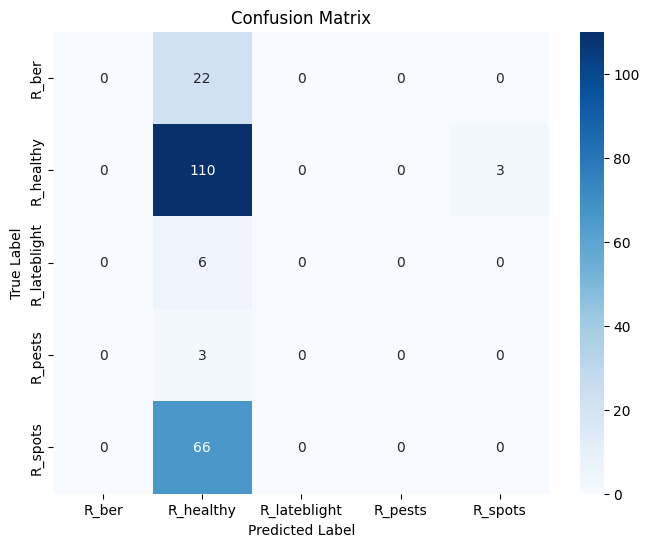


🔹 Loading model from: /content/drive/MyDrive/Tomato_dataset/models/green_cnn.h5
Found 725 images belonging to 5 classes.
🔹 Evaluating 725 images...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 613ms/step

🧩 Detected 4 true classes, 5 predicted classes.

✅ Accuracy: 0.6083
✅ F1-score: 0.6005

📊 Classification Report:
⚠️ Warning: Adjusting label mismatch automatically.
              precision    recall  f1-score   support

           0       0.80      0.14      0.24        29
           1       0.65      0.68      0.66       368
           2       0.37      0.27      0.31        26
           4       0.57      0.60      0.58       302

    accuracy                           0.61       725
   macro avg       0.60      0.42      0.45       725
weighted avg       0.61      0.61      0.60       725



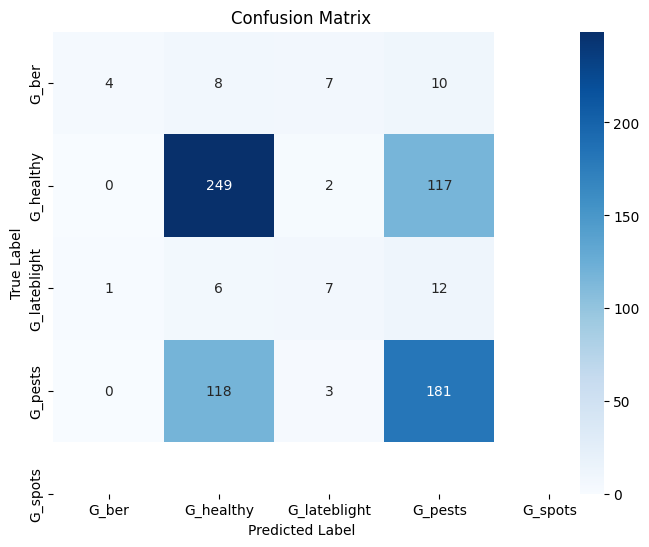

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

def evaluate_model(model_path, data_dir, img_size=(224, 224), batch_size=32):
    print(f"\n🔹 Loading model from: {model_path}")
    model = tf.keras.models.load_model(model_path, compile=False)

    datagen = ImageDataGenerator(rescale=1./255)
    val_gen = datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    print(f"🔹 Evaluating {len(val_gen.filenames)} images...")
    preds = model.predict(val_gen)
    y_pred = np.argmax(preds, axis=1)
    y_true = val_gen.classes

    # Automatically detect available labels
    class_labels = list(val_gen.class_indices.keys())
    unique_true = np.unique(y_true)
    unique_pred = np.unique(y_pred)
    num_true_classes = len(unique_true)
    num_pred_classes = preds.shape[1]

    print(f"\n🧩 Detected {num_true_classes} true classes, {num_pred_classes} predicted classes.")

    # Adjust class_labels length to match the actual prediction shape
    if len(class_labels) != num_pred_classes:
        print(f"⚠️ Adjusting label count from {len(class_labels)} → {num_pred_classes}")
        class_labels = class_labels[:num_pred_classes]

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\n✅ Accuracy: {acc:.4f}")
    print(f"✅ F1-score: {f1:.4f}\n")

    print("📊 Classification Report:")
    try:
        print(classification_report(y_true, y_pred, target_names=class_labels, zero_division=0))
    except ValueError:
        print("⚠️ Warning: Adjusting label mismatch automatically.")
        print(classification_report(y_true, y_pred, labels=unique_true, zero_division=0))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()


# 🔸 Evaluate your models
evaluate_model(
    model_path="/content/drive/MyDrive/Tomato_dataset/models/ripe_cnn.h5",
    data_dir="/content/drive/MyDrive/Tomato_dataset/cnn_crops/ripe/val"
)

evaluate_model(
    model_path="/content/drive/MyDrive/Tomato_dataset/models/green_cnn.h5",
    data_dir="/content/drive/MyDrive/Tomato_dataset/cnn_crops/green/val"
)


In [16]:
import os

def count_images_per_class(data_dir):
    class_counts = {}
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Check image counts for ripe model
ripe_train_dir = "/content/drive/MyDrive/Tomato_dataset/cnn_crops/ripe/train"
ripe_val_dir = "/content/drive/MyDrive/Tomato_dataset/cnn_crops/ripe/val"
print("🔹 Image counts for ripe model train set:")
print(count_images_per_class(ripe_train_dir))
print("🔹 Image counts for ripe model validation set:")
print(count_images_per_class(ripe_val_dir))

# Check image counts for green model
green_train_dir = "/content/drive/MyDrive/Tomato_dataset/cnn_crops/green/train"
green_val_dir = "/content/drive/MyDrive/Tomato_dataset/cnn_crops/green/val"
print("\n🔹 Image counts for green model train set:")
print(count_images_per_class(green_train_dir))
print("\n🔹 Image counts for green model validation set:")
print(count_images_per_class(green_val_dir))

🔹 Image counts for ripe model train set:
{'R_healthy': 407, 'R_lateblight': 29, 'R_spots': 189, 'R_pests': 22, 'R_ber': 62}
🔹 Image counts for ripe model validation set:
{'R_healthy': 113, 'R_lateblight': 6, 'R_spots': 66, 'R_pests': 3, 'R_ber': 22}

🔹 Image counts for green model train set:
{'G_healthy': 1565, 'G_lateblight': 131, 'G_spots': 1038, 'G_pests': 7, 'G_ber': 64}

🔹 Image counts for green model validation set:
{'G_healthy': 368, 'G_lateblight': 26, 'G_spots': 302, 'G_pests': 0, 'G_ber': 29}
